## Table Of Contents

<a id='Introduction'> <h3>1. Introdouction</h3>  </a>

<a id='Objective'><h3>2. Objective</h3></a>

<a id='Analysis'><h3>3. Data Analysis</h3></a>


<a id='EDA'><h3>4. Exploratory Data Analysis</h3></a>


<a id='Imputing'><h3>5. Data Imputing</h3></a>


<a id='Model'><h3>6. Model</h3></a>


<a id='Elbow'><h3>7. Elbow Method</h3></a>

<a id='Feature'><h3>8. Feature Selection</h3></a>

<a id='References'><h3>9. Reference</h3></a>



***

### 1. Introduction 
<blockquote>
In his 1936 article, “The use of multiple measurements in taxonomic problems,” statistician and biologist Ronald Fisher published a data set that looked at 50 samples from each of three species of Iris flower: Iris setosa, Iris virginica, and Iris versicolor. Each sample consisted of the length and width of the flower sepal and the length and width of the petals, where all four measurement components are in centimeters.
</blockquote>

 <b> - Petals </b> Petals are modified leaves that surround the reproductive parts of flowers<br>
   <b>- Sepal </b> is a part of the flower of angiosperms (flowering plants). Usually green, sepals typically function as protection for the flower in bud, and often as support for the petals when in bloom.
    

![title](Sepal_Petal.png)

***

### 2. Objective
<blockquote>
Use K-Means cluster analysis to cluster different iris species
    
</blockquote>

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Importing Data

In [2]:
df = pd.read_csv("Iris.csv")

***

### 3. Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<blockquote>
The Data consists of 5 columns, which a the SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. There are three different species which have been equalled recorded in the data as units of 50 respectively, The species consist of Setosa, Versicolor, Virginica . There are no missing variables.
    
</blockquote>

***

### 4. Exploratory Data Analysis

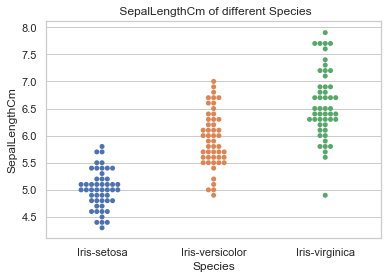

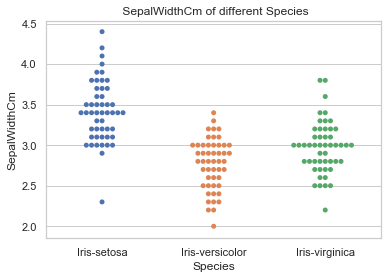

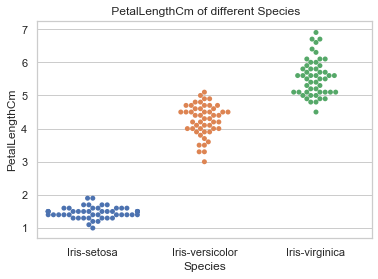

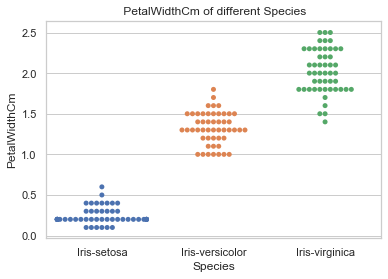

In [8]:
sns.set(style='whitegrid')
series = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i in series:
    ax = sns.swarmplot(y = df[i], x = df['Species'])
    plt.title(" %s of different Species" % i)
    plt.show()


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
<blockquote>
From the SepalLengthCm and the species, it is very difficult ot seperate the iris flower into 3 different clusters
From the SepalWidthCm and the species, there ishardly any singificant difference between the Versicolor and Virinica species
The Petal length seems to create 3 different clusters. The Petal width also seems to create 3
</blockquote>

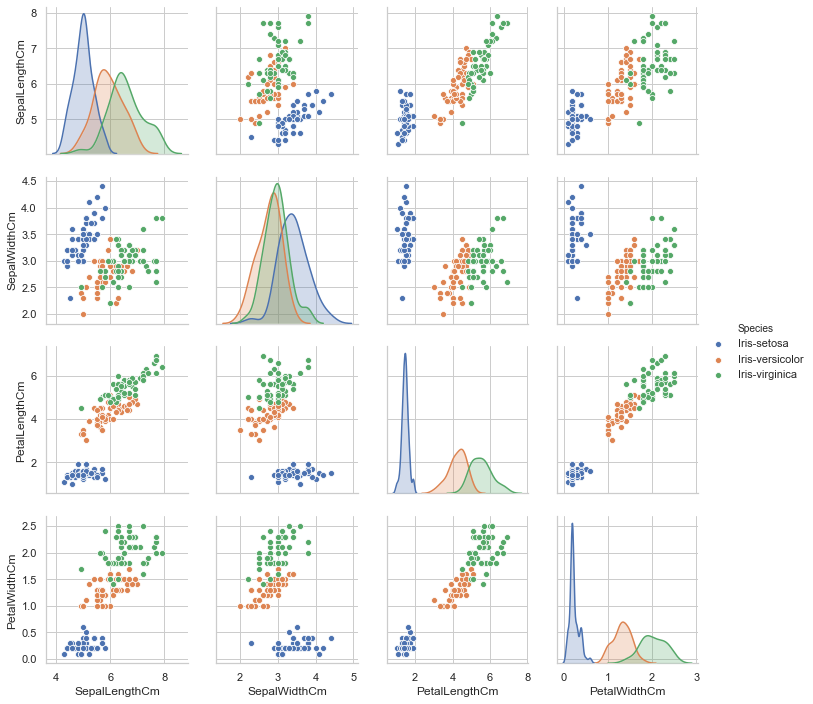

In [9]:
sns.pairplot(df.drop("Id", axis=1), hue="Species")

[]

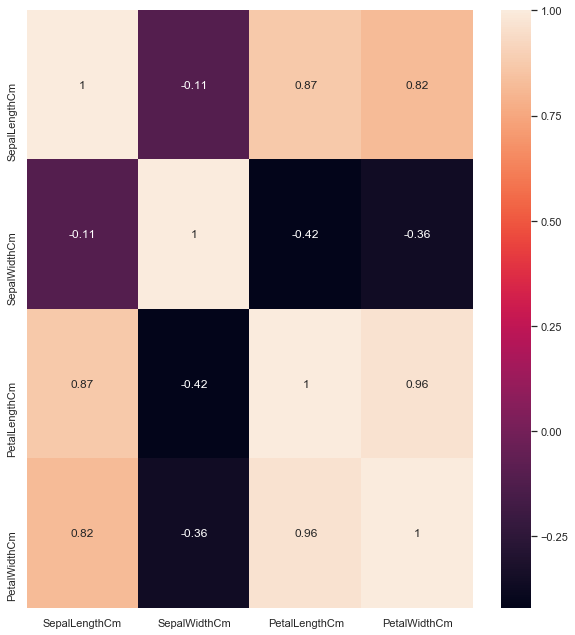

In [10]:
plt.figure(figsize=(10,11))
sns.heatmap(df[series].corr(),annot=True)
plt.plot()

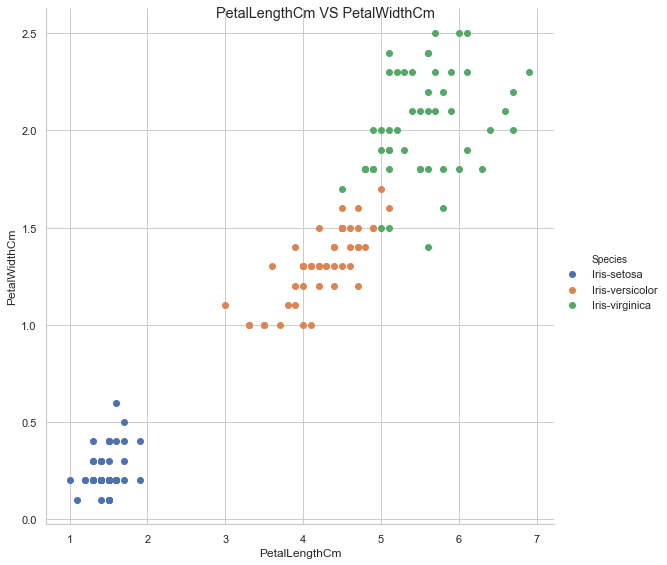

In [19]:
g = sns.FacetGrid(df, hue="Species", height=8) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

g.fig.suptitle('PetalLengthCm VS PetalWidthCm')
plt.show()

***

### 5. Data Imputing

In [12]:
df['Class'] = pd.Categorical(df["Species"])
df["Class"] = df["Class"].cat.codes

In [13]:
series = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[series]
y = df['Class']
x = df[series].values

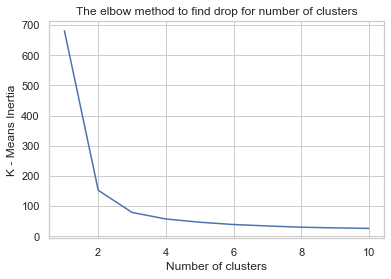

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method to find drop for number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('K - Means Inertia')
plt.show()

In [15]:
k_means = KMeans(init = "k-means++", n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
k_means.fit(x)
y_kmeans = k_means.fit_predict(x)
labels = k_means.labels_

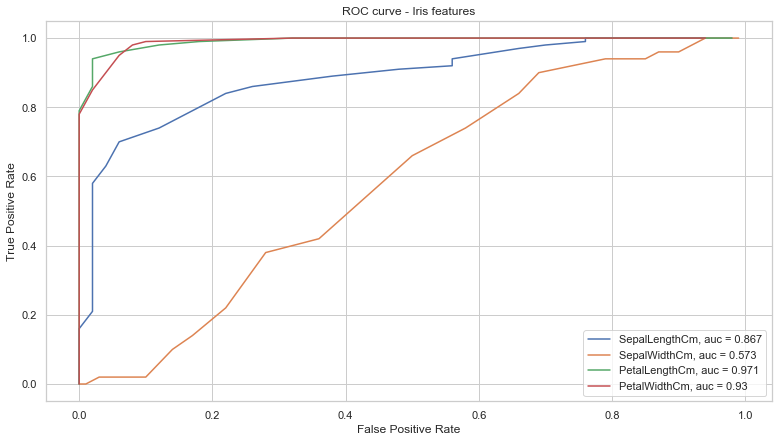

In [16]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np
# loading dataset

series = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X, y = X.to_numpy(), y.to_numpy()
y_ = y == 2
plt.figure(figsize=(13,7))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(X[:,col]),max(X[:,col]),100):
        detP = X[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label= series[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

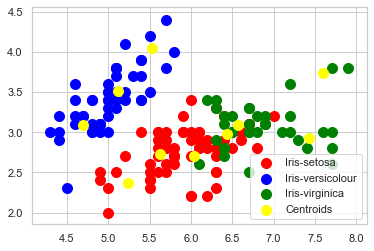

In [22]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Referennces

<blockquote>
    Akman, O. (2019). Iris Virginica. Retrieved from https://www.sciencedirect.com/topics/computer-science/iris-virginica<br><br>
    
    Azevedo, G. (2019, August 5). Feature selection techniques for classification and Python tips for their application. Retrieved from https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b
<br>
   Asaithambi, S. (2018, February 1). Why, How and When to apply Feature Selection. Retrieved from https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
</blockquote>
